# Multiple Linear Regression

This tutorial demonstrate implementation of multiple linear regression. 

The key learnings of this tutorial are as follows:

1. Modeling Linear regression
            - Key learnings
                    * loading data set
                    * loading libraries from scikit learn
                    * creating training and test set enviornment
                    * implement linear regression model
                    * evaluate linear regression model
                    * printing linear regression model in form of equation
                    * analysing results
                    
2.  Applying Hypothesis testing
            - Key learnings
                    * applying Hypothesis testing
                    * analysing results

3. Overcoming Collinearity, model overfitting and complexity using Regularization    
            - Key learnings
                    * understanding effect of Collinearity on linear regression model
                    * analysing correlation among attributes
                    * practical understanding on output of linear regression model in
                      presence of correlated festures
                    * implement, analyse Ridge regularization to avoid  collinearity,    
                      model overfitting and model complexity
                    * implement, analyse Lasso regularization to avoid  collinearity,    
                      model overfitting and model complexity
                    * discovering relevant features using Lasso model 
                    * implement, analyse Elasticnet regularization to avoid collinearity, model overfitting and model complexity
                    * Analysing results of regularization
                    * comparing results of regularization with linear regression model
               
4. Hyperparamter tuning via cross validation                     
            - Key learnings
                    * applying cross validation
                    * tunning parameters of regularization techniques using cros  
                      validation
 
The data set used for demonstration is Moneyball which can downloaded form https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/data . The data has been gathered from baseball-reference.com. It contains following features:

1. RA: runs allowed
2. RS:  runs scored
3. OBP: On Base Percentage
4. SLG: Slugging Percentage
5. BA: Batting Average
6. OOBP: opponent’s OBP
7. OSLG: opponent’s SLG
8. W:  wins in that season

The features from 1-7 are used as indicator variables to predict the outcome W(i.e., wins in season). 

The step by step practical learning on implementing and analysing multiple linear regression to predict W is demonstrated below.


# 1. Loading libraries

In [1]:
import pandas as pd # importing pandas
import numpy as np  # importing mumpy
from sklearn import linear_model   # imports linear_model from scikit learn
from sklearn import metrics # for model evaluation
from sklearn.model_selection import train_test_split # using scikit learn for hold-out
import matplotlib.pyplot as plt # for visualization

# 2. Loading data set

In [2]:
# Loading data set from local machine.
df =pd.read_csv('baseball.csv')

In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
dataset=df.iloc[:,[3,4,5,6,7,8,13,14]]
dataset.head()

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403
3,734,806,69,0.315,0.415,0.260,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0.335,0.424


In [5]:
dataset.shape
dataset.isnull().sum()

RS        0
RA        0
W         0
OBP       0
SLG       0
BA        0
OOBP    812
OSLG    812
dtype: int64

In [6]:
dataset['OOBP'].fillna(dataset['OOBP'].mean(),inplace=True)
dataset['OSLG'].fillna(dataset['OSLG'].mean(),inplace=True)

C:\Users\DIVYA CHITRANSH\AppData\Local\Temp\ipykernel_26940\175157634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['OOBP'].fillna(dataset['OOBP'].mean(),inplace=True)
C:\Users\DIVYA CHITRANSH\AppData\Local\Temp\ipykernel_26940\175157634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['OSLG'].fillna(dataset['OSLG'].mean(),inplace=True)


In [7]:
dataset['OOBP'].isnull().sum()
dataset['OSLG'].isnull().sum()

0

## 3. Applying Hold-out method to create Train and Test split

In [8]:
# My_data contains all data points from My_data set from from first feature to 6th feature(indicator features)
My_data = dataset.iloc[:,0:7] 

# My_target contains class information which is 7th feature in the data set of 

My_data_target=dataset.iloc[:,7]


X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.7, random_state=10)


#print(My_data.head())

#print(My_data_target.head())

## 4.  Building Multiple Linear Regression model

In [9]:
#Create a Mulitple Linear Regression model.

LR_model = linear_model.LinearRegression()

#Train the model using the training sets

LRfitted = LR_model.fit(X_train, Y_train)



## 4.1 Understanding the learnt Multiple Linear Regression model

1. Getting the intercept 
2. Getting the coefficients/weights 
3. Printing the  Multiple Linear Regression model

In [10]:
# printing the intercept of the model learned

print("The intercept of the model : ", LRfitted.intercept_)

# printing the coefficients of the model learned against features present in the data set
print("\n")
Feature_names = list(My_data.columns.values)
table_coeff= pd.DataFrame({'Feature_name':Feature_names , 'Coefficients': LRfitted.coef_})  
print("The coefficients learned against each feature present in the data set \n")
print(table_coeff)



# printing the Linear regression model
print("\n")
print("The linear regression model \n")

print("W ="  ,round(LRfitted.intercept_,2), "+", " RA" " X", round(LRfitted.coef_[0],2)
     , "+ OBP" " X"  ,round(LRfitted.coef_[1],2) , "+ SLG" " X"  ,round(LRfitted.coef_[2],2)
    , "+ BA" " X"  ,round(LRfitted.coef_[3],2) , "+ Playoff" " X"  ,round(LRfitted.coef_[4],2)
     , "+ RD" " X"  ,round(LRfitted.coef_[5],2), "+ W" " X"  ,round(LRfitted.coef_[6],2)
     )
print("\n")


The intercept of the model :  -0.02133966037975049


The coefficients learned against each feature present in the data set 

  Feature_name  Coefficients
0           RS      0.000004
1           RA      0.000032
2            W      0.000115
3          OBP     -0.121359
4          SLG     -0.023418
5           BA      0.088167
6         OOBP      1.301133


The linear regression model 

W = -0.02 +  RA X 0.0 + OBP X 0.0 + SLG X 0.0 + BA X -0.12 + Playoff X -0.02 + RD X 0.09 + W X 1.3





## 5.  Hypothesis Testing

This test helps to find the importance of variables( significance) with respect to the hypothesis. To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant. We can calculate the p-value using another library called ‘statsmodels’.<br>

The ordinary least squares (OLS) algorithm is a method for estimating the parameters of a linear regression model. The OLS algorithm aims to find the values of the linear regression model's parameters (i.e., the coefficients) that minimize the sum of the squared residuals.

In [11]:
import statsmodels.api as sm


model = sm.OLS(Y_train, X_train)

Statsmodel = model.fit()
print(round(Statsmodel.pvalues,2))



RS      0.39
RA      0.02
W       0.42
OBP     0.03
SLG     0.32
BA      0.21
OOBP    0.00
dtype: float64


The hypothesis testing reveals that all features other than BA  are statically significant

## 5. Apply Model to the Test Set

In [12]:
Prediction_test = LRfitted.predict(X_test)
Prediction_train = LRfitted.predict(X_train)


## 6. Evaluate Model Performance on Test set

The coefficients for each indicator feature in data set are
        Actual  Predicted
123   0.390000   0.405957
691   0.419743   0.420124
1130  0.419743   0.418473
778   0.419743   0.422944
716   0.419743   0.420857
...        ...        ...
14    0.399000   0.412673
214   0.407000   0.410242
893   0.419743   0.421725
327   0.463000   0.456414
160   0.442000   0.464139

[863 rows x 2 columns]


Text(0, 0.5, 'Predicted values')

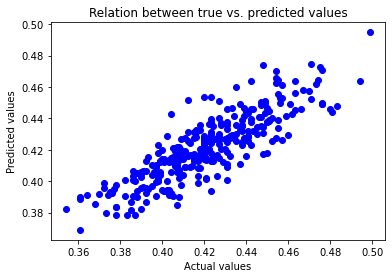

In [13]:
#Predict the response on the test data set

print("The coefficients for each indicator feature in data set are")

Performance= pd.DataFrame({'Actual':Y_test, 'Predicted': Prediction_test})  

print(Performance)

plt.scatter(Y_test, Prediction_test,  color='blue')

plt.title('Relation between true vs. predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


The output in the table details the actual and predicted values by the model. It is observed from the entries that the model learnt is very close to the actual values. The same is demonstrated by the figure. 

## 7. Evaluating the Performance of the model

In [14]:
# summarize the performance of the model using MAE, MSE and Rsquare

print("Mean absolute Error:", round(metrics.mean_absolute_error(Y_test, Prediction_test),2))
print("\n")
print("Mean squared Error:", round(metrics.mean_squared_error(Y_test, Prediction_test),2))
print("\n")
print("R2 score:", round(metrics.r2_score(Y_test, Prediction_test),4)*100,"%")

Mean absolute Error: 0.0


Mean squared Error: 0.0


R2 score: 71.32 %


The low MAE, MSE and high R2 score is 88.32% indicates a good model 

## 8.  Overcoming  Model overfitting, Collinearity and Model complexity using Regularization

In general a good model is the one that just not fit good to the sample of data set provided but, also to the any new sample of data set. Overfitting is a situation where models fits excellent on the training data set but, fails to produce the same result on the testing data set. Overfitting is a common issue in supervised learning and shall be avoided. Other most common issue in multiple linear regression is model complexity where, the weights learnt by the model are heavy. The aim is to produce less complex model for easy understanding and analysing than producing complex models difficult to interpret. The model complexity increases with presence of collinearity in features present in the data set. Collinearity indicates high correlation amnong indicator features. To produce model that does not overfit and is less complex in nature, the collinearity has to handled. 

The practical demonstration below details the effect of collinearity and overfitting issues and methods to overcome them. 

### 8.1 Generating Correlation matrix 

In [15]:
# the corr() function generates pair wise correlation between features
corr = dataset.corr()
# following code is used to visually inspect the pair wise correlation
corr.style.background_gradient(cmap='coolwarm')


,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
RS,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.071329,0.102976
RA,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,0.500050,0.499487
W,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,-0.376013,-0.336993
OBP,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.065499,0.083472
SLG,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.065848,0.096316
BA,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.097967,0.119277
OOBP,0.071329,0.500050,-0.376013,0.065499,0.065848,0.097967,1.000000,0.830902
OSLG,0.102976,0.499487,-0.336993,0.083472,0.096316,0.119277,0.830902,1.000000


As indicated by the results, R, OBP. SLG. BA are very strongly correlated. In order to understand the effect of this correlation on the output of multiple linear regression modeling, we create three different models:

Model 1: having features RS and OBP

Model 2: having features RS, OBP and SLG

Model 3: having features RS, OBP, SLG and BA

Following section creates data sets for generation of these models. 

## 8.2 Creating data sets using Hold -out for Generating models in presence of high  correlated features|

In [16]:
# creating data set for model containing RS and OBP

My_data_two = dataset.iloc[:,[0,2]] 

My_data_two_target=dataset.iloc[:,7]


X_train_two, X_test_two, Y_train_two, Y_test_two = train_test_split(My_data_two, My_data_two_target, test_size=0.7, random_state=10)


# creating data set for model containing RS,  OBP, SLG

My_data_three= dataset.iloc[:,[0,2,3]] 

My_data_three_target=dataset.iloc[:,7]


X_train_three, X_test_three, Y_train_three, Y_test_three = train_test_split(My_data_three, My_data_three_target, test_size=0.7, random_state=10)

# creating data set for model containing RS,OBP, SLG, BA

My_data_four = dataset.iloc[:,[0,2, 3,4]] 

My_data_four_target=dataset.iloc[:,7]


X_train_four, X_test_four, Y_train_four, Y_test_four = train_test_split(My_data_four, My_data_four_target, test_size=0.7, random_state=10)


## 8.3 Training  the three new models


In [17]:

#Train the model using X_train_two, Y_train_two associated with data set containing
#features RS, OBP
#we call the linearr regression model again and again as its fitted with one data, it will predict on the basis of its fitted curve

LR_model_two = linear_model.LinearRegression()
LRfitted_two = LR_model_two.fit(X_train_two, Y_train_two)

#Train the model using X_train_three, Y_train_three associated with data set containing
#features RS, OBP, SLG

LR_model_three = linear_model.LinearRegression()
LRfitted_three = LR_model_three.fit(X_train_three, Y_train_three)

#Train the model using X_train_four, Y_train_four associated with data set containing
#features RS, OBP, SLG, BA

LR_model_four = linear_model.LinearRegression()
LRfitted_four = LR_model_four.fit(X_train_four, Y_train_four)


## 8.4 Predicting training and test error for different models

The training and test errors gives a good indication of overfitting. High training error and low test errors is indication to model overfitting. The code below evaluate model performance on training and test set. The errors are computed using the difference between actual and predicted values by the model. To do this, we need to predict the training and testing errors using predict() function on all the models generated so far :

Model 1: having features RS and OBP

Model 2: having features RS, OBP and SLG

Model 3: having features RS, OBP, SLG and BA

Model 4: original model containing all features


In [18]:
# Predicting training and testing error on X_train_two, X_test_two 
# (model with features RS and OBP)

Prediction_train_two = LRfitted_two.predict(X_train_two)
Prediction_test_two = LRfitted_two.predict(X_test_two)


# Predicting training and testing error on X_train_three, X_test_three 
# (model with features RS, OBP, SLG )

Prediction_train_three = LRfitted_three.predict(X_train_three)
Prediction_test_three = LRfitted_three.predict(X_test_three)

# Predicting training and testing error on X_train_four, X_test_four 
# (model with features RS, OBP, SLG, BA )

Prediction_train_four = LRfitted_four.predict(X_train_four)
Prediction_test_four = LRfitted_four.predict(X_test_four)

#Predicting training and testing error on X_train, X_test 
# (model with all features RS,RA, OBP, SLG, BA, Playoff, RD )

Prediction_train_all = LRfitted.predict(X_train)
Prediction_test_all = LRfitted.predict(X_test)


## 8.5 Preparing summary of  Train, Test error, Sum of absolute weights for different models

In [19]:

columns =['Model', 'Train Errors', 'Test Errors', 'SAW', 'Rsquare %']
######################## Summary of Model one ###########################
# Summary of training,test error and sum of absolute Weights(SAW) for model containing 
# features RS and OBP

Reg_model1 = "RS and OBP"

Reg_model1_values = [Reg_model1, 
                 round(metrics.mean_absolute_error(Y_train_two, Prediction_train_two),2),
                round(metrics.mean_absolute_error(Y_test_two, Prediction_test_two),2),
              np.absolute(LRfitted_two.coef_).sum() + np.absolute(LRfitted_two.intercept_),
                 '---'   ]
######################## Summary of Model two ###########################
# Summary of training,test error and sum of absolute Weights(SAW) for model containing 
# features RS ,OBP, SLG

Reg_model2 = "RS,OBP,SLG"

Reg_model2_values = [Reg_model2, 
               round(metrics.mean_absolute_error(Y_train_three, Prediction_train_three),2),
               round(metrics.mean_absolute_error(Y_test_three, Prediction_test_three),2),
            np.absolute(LRfitted_three.coef_).sum() +np.absolute(LRfitted_three.intercept_),
               "---"     ]
######################## Summary of Model three  ###########################
# Summary of training,test error and sum of absolute Weights(SAW) for model containing 
# features RS ,OBP, SLG, BA

Reg_model3 = "RS,OBP,SLG,BA"

Reg_model3_values = [Reg_model3, 
                round(metrics.mean_absolute_error(Y_train_four, Prediction_train_four),2),
                round(metrics.mean_absolute_error(Y_test_four, Prediction_test_four),2),
             np.absolute(LRfitted_four.coef_).sum() + np.absolute(LRfitted_four.intercept_),
                 '---'   ]


######################## Summary of Model four  ###########################
# Summary of training,test error and sum of absolute Weights(SAW) for model containing 
# all features

Reg_model4 = "All features"

Reg_model4_values = [Reg_model4, 
                 round(metrics.mean_absolute_error(Y_train, Prediction_train),2),
                round(metrics.mean_absolute_error(Y_test, Prediction_test),2),
           np.absolute( LRfitted.coef_).sum() + np.absolute(LRfitted.intercept_),
            round(metrics.r2_score(Y_test, Prediction_test),4)*100 ]

Models_summary = pd.DataFrame([Reg_model1_values, Reg_model2_values, 
                               Reg_model3_values,Reg_model4_values
                               ],
                              columns= columns)
print(Models_summary)



           Model  Train Errors  Test Errors       SAW Rsquare %
0     RS and OBP          0.01         0.01  0.435749       ---
1     RS,OBP,SLG          0.01         0.01  0.455684       ---
2  RS,OBP,SLG,BA          0.01         0.01  0.596245       ---
3   All features          0.00         0.00  1.555568     71.32


As indicated by the train and test errors on all the models, overfitting does not seem to an issue. However, as the number of correlated features increases in the model, the complexity grows, as indicated by the column SAW(sum of absolute weights). 

The next part of this tutorial aims to produce low complex model by treating the correlated features present in the data set using Regularization. It is a technique that controls overfitting, produces less complex model with higher performance rates. There are three types of regularization:

1. Ridge(L2) 

    - it produces low complex model
    - reduces the collinearity
    - not suitable for high dimensional data
    
2. Lasso (L1)
    
    - provides important features for deciding the outcome. 
    - reduces the collinearity
    - produces low complex model
    - suitable for high dimensional data
    
3. Elastic net

    - combines features of both L1 and L2
    
    
    

## 8.5 Implementing Ridge

Ridge will be implemented for on the original data set to make it less complex (by
removing the collinearity that results in lowering the sum of absolute weights). The
Ridge model is also evaluated for training and testing errors. The final results of Ridge application is added in the data frame containing previous results


In [20]:
# Using Ridge function, create its object. Ridge is controlled by parameter alpha. It can 
#be set by the user to tune results. 

ridge = linear_model.Ridge(alpha =1)

# Fitting ridge on data set containing all features
ridge.fit(X_train, Y_train)

# Getting prediction on train and test sets
Ridge_pred_train = ridge.predict(X_train)
Ridge_pred_test= ridge.predict(X_test)

# preparing summary of training, test errors, sum of absolute Weights(SAW) and rsquare

Reg_model_Ridge = "Ridge on All features"
Ridge_values = [Reg_model_Ridge,
        round(metrics.mean_absolute_error(Y_train, Ridge_pred_train),2),
        round(metrics.mean_absolute_error(Y_test, Ridge_pred_test),2),
        np.absolute(ridge.coef_).sum() +np.absolute(ridge.intercept_ ),
         round(metrics.r2_score(Y_test, Ridge_pred_test),4)*100           ]


## 8.6 Implementing Lasso Regression

The following code implements LASSO on the original data set to make it less complex (by
removing the collinearity that results in lowering the sum of absolute weights) andto find important features for the decision variable. The LASSO model is also evaluated for training and testing errors. The final results of LASSO application is added in the data frame containing previous results

In [21]:
# Loading library


# Using lasso function, create its object. lasso is controlled by parameter alpha. It can 
#be set by the user to tune results. 

lasso = linear_model.Lasso(alpha =0.2)

# Fitting lasso on data set containing all features
lasso.fit(X_train, Y_train)

# Getting prediction on train and test sets
lasso_pred_train = lasso.predict(X_train)
lasso_pred_test= lasso.predict(X_test)

# preparing summary of training, test errors, sum of absolute Weights(SAW) and rsquare
Reg_model_Lasso = "Lasso on All features"
Lasso_values = [Reg_model_Lasso,
        round(metrics.mean_absolute_error(Y_train, lasso_pred_train),2),
        round(metrics.mean_absolute_error(Y_test, lasso_pred_test),2),
        np.absolute(lasso.coef_).sum() +np.absolute(lasso.intercept_ ),
         round(metrics.r2_score(Y_test, lasso_pred_test),4)*100           ]



### 8.6.1 Analysing important features as resulted by LASSO regularization

The key aim is to discover how many variables Lasso picked out of total list of features present in the data set ? For non relevant features, LASSO makes the coefficient equal to 
zero.  The following code find all those features where the coefficients(weights) of the 
LASSO model for features were discovered to be zero. 




In [24]:
# Performance of Lasso 
print("\n")
print("Lasso picked " + str(sum(lasso.coef_!= 0)) 
      + " features and eliminated the other " +  
      str(sum(lasso.coef_ == 0)) + " variables")

print("\n")
# Printing relevant and nonrelevant features as discovered by Lasso 
Relevant_features =[]
Nonrelevant_features =[]
for i in range(len(dataset.columns)-1):
    if(lasso.coef_[i]!=0):
        Relevant_features.append(dataset.columns[i])
    else:
        Nonrelevant_features.append(dataset.columns[i])
    
print("List of Relevant features: \n ", Relevant_features)
print("\n")
print("List of Nonrelevant features: \n ", Nonrelevant_features)




Lasso picked 1 features and eliminated the other 6 variables


List of Relevant features: 
  ['RA']


List of Nonrelevant features: 
  ['RS', 'W', 'OBP', 'SLG', 'BA', 'OOBP']


LASSO discovers features RS, RA, Playoff and RD as only relevant features. It means that
only these features are enough to be used out of total available for model building. 

## 8.8 Evaluating results of all models

In this section we add, results of Ridge, LASSO and ElasticNet to the Pandas DataFrame created earlier for comparison of results. 



In [72]:
# putting summary of results in Pandas dataframe and printing it
columns =['Model', 'Train Errors', 'Test Errors', 'SAW', 'Rsquare %']
regularization = pd.DataFrame([ Ridge_values, Lasso_values],
                              columns= columns)


results = [Models_summary, regularization]
All_models_summary= pd.concat(results, ignore_index=True)                           
print(All_models_summary)


                   Model  Train Errors  Test Errors       SAW Rsquare %
0             RS and OBP          0.01         0.01  0.435749       ---
1             RS,OBP,SLG          0.01         0.01  0.455684       ---
2          RS,OBP,SLG,BA          0.01         0.01  0.596245       ---
3           All features          0.00         0.00  1.555568     71.32
4  Ridge on All features          0.01         0.01  0.407650     28.61
5  Lasso on All features          0.01         0.01  0.385374     21.07


The regularization methods have significantly decreased the sum of absolute weights by keeping low training and test errors and high rsquare value.

## 8.9 Generating Regression equations of all models and comparing their weights

In [73]:
############ model on features RS, OBP #############

LR_model_one_features_names = list(['RS', 'OBP'])

LR_model_one_table_coeff= pd.DataFrame({'Feature_name':LR_model_one_features_names ,
                                        'Coefficients': LRfitted_two.coef_})  

# printing the Linear regression model
print("\n")
print("The LR model on RS and OBP \n")

print("W ="  ,round(LRfitted_two.intercept_,2), "+",
      " RS" " X", round(LRfitted_two.coef_[0],2),
     "+ OBP" " X"  ,round(LRfitted_two.coef_[1],2))
     
print("\n")


############ model on features RS, OBP, SLG #############

LR_model_two_features_names = list(['RS', 'OBP', 'SLG'])

LR_model_two_table_coeff= pd.DataFrame({'Feature_name':LR_model_two_features_names ,
                                        'Coefficients': LRfitted_three.coef_})  


# printing the Linear regression model

print("The LR model on RS,OBP, SLG \n")

print("W ="  ,round(LRfitted_three.intercept_,2), "+",
      " RS" " X", round(LRfitted_three.coef_[0],2),
     "+ OBP" " X"  ,round(LRfitted_three.coef_[1],2),  
      "+ SLG" " X"  ,round(LRfitted_three.coef_[2],2)
     )
print("\n")


############ model on features RS, OBP, SLG, BA #############



LR_model_three_features_names = list(['RS', 'OBP', 'SLG', 'RA'])

LR_model_three_table_coeff= pd.DataFrame({'Feature_name':LR_model_three_features_names ,
                                        'Coefficients': LRfitted_four.coef_})  


# printing the Linear regression model

print("The LR model on RS, OBP, SLG, BA \n")

print("W ="  ,round(LRfitted_four.intercept_,2), "+", 
      " RS" " X", round(LRfitted_four.coef_[0],2), 
     "+ OBP" " X"  ,round(LRfitted_four.coef_[1],2),  
      "+ SLG" " X"  ,round(LRfitted_four.coef_[2],2),
     "+ BA" " X", round(LRfitted_four.coef_[3],2)
      )
print("\n")



############ model on features RS, OBP, SLG, BA, Playoff, RD #############



LR_model_features_names = list(['RS','RA','OBP', 'SLG', 'BA', 'Playoff', 'RD'])

LR_model_table_coeff= pd.DataFrame({'Feature_name':LR_model_features_names ,
                                        'Coefficients': LRfitted.coef_})  


# printing the Linear regression model

print("The LR model on RS, RA, OBP, SLG, BA, Playoff, RD \n")

print("W ="  ,round(LRfitted.intercept_,2), 
      "+ RS" " X", round(LRfitted.coef_[0],2), 
      "+ RA" " X"  ,round(LRfitted.coef_[1],2),
      "+ OBP" " X"  ,round(LRfitted.coef_[2],2), 
      "+ SLG" " X"  ,round(LRfitted.coef_[3],2),
       "+ BA" " X", round(LRfitted.coef_[4],2),
      "+ Playoff" " X", round(LRfitted.coef_[5],2),
      "+ RD" " X", round(LRfitted.coef_[6],2),
      

      )
print("\n")


############ Ridge model on features RS, RA OBP, SLG, BA, Playoff, RD #############


Ridge_Feature_names = list(My_data.columns.values)


Ridge_table_coeff= pd.DataFrame({'Feature_name':Ridge_Feature_names , 
                                 'Coefficients': ridge.coef_})  

# printing the Ridge Linear regression model
print("The Ridge model on the dataset \n")

print("W ="  ,round(ridge.intercept_,2), 
      "+ RS" " X", round(ridge.coef_[0],2), 
      "+ RA" " X"  ,round(ridge.coef_[1],2),
      "+ OBP" " X"  ,round(ridge.coef_[2],2), 
      "+ SLG" " X"  ,round(ridge.coef_[3],2),
       "+ BA" " X", round(ridge.coef_[4],2),
      "+ Playoff" " X", round(ridge.coef_[5],2),
      "+ RD" " X", round(ridge.coef_[6],2),
      

      )
print("\n")



############ Lasso model on features RS, RA OBP, SLG, BA, Playoff, RD #############


Lasso_Feature_names = list(My_data.columns.values)

Lasso_table_coeff= pd.DataFrame({'Feature_name':Lasso_Feature_names , 
                                 'Coefficients': lasso.coef_})  

# printing the Lasso Linear regression model
print("The Lasso model on the data set\n")
print("W ="  ,round(ridge.intercept_,2), 
      "+ RS" " X", round(lasso.coef_[0],2), 
      "+ RA" " X"  ,round(lasso.coef_[1],2),
      "+ OBP" " X"  ,round(lasso.coef_[2],2), 
      "+ SLG" " X"  ,round(lasso.coef_[3],2),
       "+ BA" " X", round(lasso.coef_[4],2),
      "+ Playoff" " X", round(lasso.coef_[5],2),
      "+ RD" " X", round(lasso.coef_[6],2),
      

      )





The LR model on RS and OBP 

W = 0.44 +  RS X 0.0 + OBP X -0.0


The LR model on RS,OBP, SLG 

W = 0.44 +  RS X 0.0 + OBP X -0.0 + SLG X -0.02


The LR model on RS, OBP, SLG, BA 

W = 0.46 +  RS X 0.0 + OBP X -0.0 + SLG X -0.05 + BA X -0.08


The LR model on RS, RA, OBP, SLG, BA, Playoff, RD 

W = -0.02 + RS X 0.0 + RA X 0.0 + OBP X 0.0 + SLG X -0.12 + BA X -0.02 + Playoff X 0.09 + RD X 1.3


The Ridge model on the dataset 

W = 0.37 + RS X -0.0 + RA X 0.0 + OBP X -0.0 + SLG X -0.0 + BA X -0.01 + Playoff X 0.0 + RD X 0.03


The Lasso model on the data set

W = 0.37 + RS X -0.0 + RA X 0.0 + OBP X -0.0 + SLG X -0.0 + BA X -0.0 + Playoff X 0.0 + RD X 0.0


## 8.10 Visualization of Results of all models on significance of features



<AxesSubplot:title={'center':'Lasso model'}>

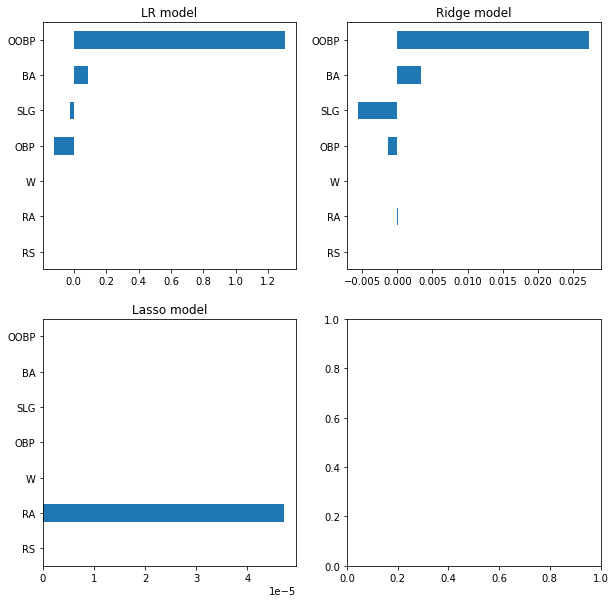

In [74]:
Features_importance_model = pd.Series(LRfitted.coef_, index= X_train.columns)
Features_importance_Ridge = pd.Series(ridge.coef_, index= X_train.columns)
Features_importance_Lasso = pd.Series(lasso.coef_, index= X_train.columns)

fig, axs = plt.subplots(2, 2, figsize=(10,10))
Features_importance_model.plot(ax=axs[0,0], kind='barh', title ='LR model' )

Features_importance_Ridge.plot(ax=axs[0,1], kind='barh', title ='Ridge model')
Features_importance_Lasso.plot(ax=axs[1,0], kind='barh', title ='Lasso model')


As discussed earlier, LASSO model not only helps in making the model less complex but, it can also be used to find important features. The most important features for the outcome variable W are Playoff, RD, RA and RS as discovered by LASSO and Elasticnet models

# 9. Hyperparameter Selection via Cross-Validation

The output of regularization techniques depends on the value given to the  paramter alpha. The good choice of value of alpha can be discovered by cross-validation technique. 

The following codes find best alpha for Ridge and LASSO using 10 cross validation and alpha value ranging from 0.2 to 1.0. 


## 9.1 Tuning Hyperparameter parameter of Ridge regression using Cross-validation

In [75]:
# Using RidgeCV function, create its object. RidgeCV is controlled by parameters cv and
# alphas. Paramter cv defines number of cross validation cycles whereas, range of 
# different alpha values can be listed using alphas parameter. 

ridge_cv = linear_model.RidgeCV(cv =10, alphas =[0.2, 0.4,0.5,0.6,0.8,1.0])

# Fitting ridge on data set containing all features
ridge_cv.fit(X_train, Y_train)

# Getting prediction on train and test sets
Ridge_cv_pred_train = ridge_cv.predict(X_train)
Ridge_cv_pred_test= ridge_cv.predict(X_test)

# preparing summary of training, test errors, sum of absolute Weights(SAW) and rsquare

Ridge_cv_model = "RidgeCV on All features"
Ridge_cv_values = [Ridge_cv_model,
        round(metrics.mean_absolute_error(Y_train, Ridge_cv_pred_train),2),
        round(metrics.mean_absolute_error(Y_test, Ridge_cv_pred_test),2),
        np.absolute(ridge_cv.coef_).sum() +np.absolute(ridge_cv.intercept_ ),
         round(metrics.r2_score(Y_test,Ridge_cv_pred_test),4)*100           ]

print("The best alpha value discovered:" ,ridge_cv.alpha_)


The best alpha value discovered: 0.2


## 9.2  Tuning Hyperparameter parameter of Lasso regression using Cross-validation

In [76]:
# Using LassoCV function, create its object. LassoCV is controlled by parameters cv and
# alphas. Paramter cv defines number of cross validation cycles whereas, range of 
# different alpha values can be listed using alphas parameter. 

lasso_cv = linear_model.LassoCV(cv =10, alphas =[0.2, 0.4,0.5,0.6,0.8,1.0])

# Fitting Lasso on data set containing all features
lasso_cv.fit(X_train, Y_train)

# Getting prediction on train and test sets
Lasso_cv_pred_train = lasso_cv.predict(X_train)
Lasso_cv_pred_test= lasso_cv.predict(X_test)

# preparing summary of training, test errors, sum of absolute Weights(SAW) and rsquare

Lasso_cv_model = "LassoCV on All features"
Lasso_cv_values = [Lasso_cv_model,
        round(metrics.mean_absolute_error(Y_train, Lasso_cv_pred_train ),2),
        round(metrics.mean_absolute_error(Y_test, Lasso_cv_pred_test),2),
        np.absolute(lasso_cv .coef_).sum() +np.absolute(lasso_cv .intercept_ ),
         round(metrics.r2_score(Y_test,Lasso_cv_pred_test),4)*100           ]

print("The best alpha value discovered:" ,lasso_cv.alpha_)

The best alpha value discovered: 0.2


# Summary

This script demonstrates  fitting Multiple linear regression models to a given dataset. Regression concepts such as  model overfitting, collinearlity, model complexity are discussed.A practical understanding on  regularization methods, called ridge and lasso regression are also presented.

Multiple-Linear-Regression-with-Regularization
A small project addressing a regression problem explains implementation of multiple linear regression techniques, hyperparameter tuning, collinearity, model overfitting and complexity using LASSO, Ridge and Elastic net

Key learnings:

1.understanding effect of Collinearity on linear regression model<br>
2.analysing correlation among attributes<br>
3.practical understanding on output of linear regression model in presence of correlated festures 4.implement, analyse Ridge regularization to avoid collinearity,
model overfitting and model complexity<br>
implement, analyse Lasso regularization to avoid collinearity,
4.model overfitting and model complexity<br>
5.discovering relevant features using Lasso model<br>
6.implement, analyse Elasticnet regularization to avoid collinearity , model overfitting and model complexity<br><br>
7.Analysing results of regularization<br>
8.comparing results of regularization with linear regression model<br>